In [42]:
import pandas as pd
import numpy as np
import os
# data from hockey-reference.com

In [23]:
bruinsReg = pd.read_csv(r'C:\\Users\\Danielle\\BostonRegular.csv')
bruinsPlayoff = pd.read_csv(r'C:\\Users\\Danielle\\BostonPlayoff.csv')
bluesReg = pd.read_csv(r'C:\\Users\\Danielle\\BluesRegular.csv')
bluesPlayoff = pd.read_csv(r'C:\\Users\\Danielle\\BluesPlayoff.csv')

# We need to clean up this data. The stats for goalies are totally different than regular players, so we should remove 
#their rows. 

bruinsReg = bruinsReg[bruinsReg.Pos != 'G']
bruinsPlayoff = bruinsPlayoff[bruinsPlayoff.Pos != 'G']
bluesReg = bluesReg[bluesReg.Pos != 'G']
bluesPlayoff = bluesPlayoff[bluesPlayoff.Pos != 'G']

# Next, I'm going to filter out players that have only played less than ten percent of the total games played (about 8 games). 

bruinsReg = bruinsReg[bruinsReg.GP >= 9]
bruinsPlayoff = bruinsPlayoff[bruinsPlayoff.GP >= 9]
bluesReg = bluesReg[bluesReg.GP >= 9]
bluesPlayoff = bluesPlayoff[bluesPlayoff.GP >= 9]

In [11]:
bluesPlayoff.columns

Index([u'No.', u'Player', u'Pos', u'Age', u'GP', u'Scoring G', u'Scoring A',
       u'Scoring PTS', u'+/-', u'PIM', u'Goals EV', u'Goals PP', u'Goals SH',
       u'Goals GW', u'Assists EV', u'Assists PP', u'Assists SH', u'S', u'S%',
       u'SHFT', u'Ice Time TOI', u'Ice Time ATOI'],
      dtype='object')

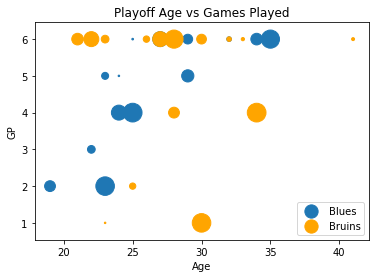

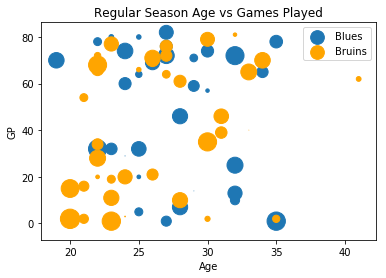

In [43]:
area = (20 * np.random.rand(50))**2
ax = bluesPlayoff.plot.scatter(x='Age', y='GP', s = area, label="Blues",)
bruinsPlayoff.plot.scatter(x='Age', y='GP', color = 'orange', s= area, label= "Bruins", ax=ax, title = "Playoff Age vs Games Played")

area = (20 * np.random.rand(50))**2
ax = bluesReg.plot.scatter(x='Age', y='GP', s = area, label="Blues",)
bruinsReg.plot.scatter(x='Age', y='GP', color = 'orange', s= area, label= "Bruins", ax=ax, title = "Regular Season Age vs Games Played")
#pretty evenly matched!

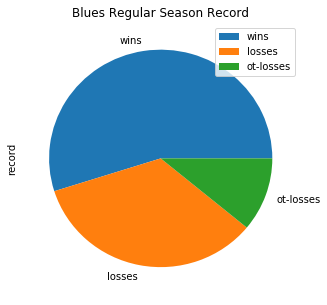

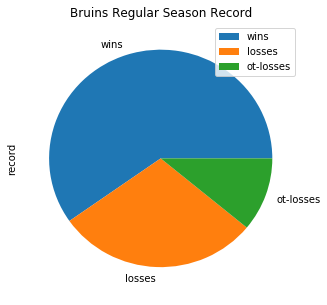

In [50]:
bluesRecord = pd.DataFrame({'record': [.548780, .341463, .109756]}, index=['wins', 'losses', 'ot-losses'],)
plot = bluesRecord.plot.pie(y='record', figsize=(5, 5), title = "Blues Regular Season Record")

bruinsRecord = pd.DataFrame({'record': [.597560, .29268, .109756]}, index=['wins', 'losses', 'ot-losses'],)
plot = bruinsRecord.plot.pie(y='record', figsize=(5, 5), title = "Bruins Regular Season Record")



In [38]:
# I'm interested in the relationship between Penalties in Minutes (PIM) and total points scored by a player. Let's do some
# regression to find out. I'm going to use the Blues' Regular Season data. 

bluesRegPoints = bluesReg['Scoring PTS']
bluesRegPIM = bluesReg['PIM']

import statsmodels.api as sm

model = sm.OLS(bluesRegPIM, bluesRegPoints).fit()
predictions = model.predict(bluesRegPoints) # make the predictions by the model

# Print out the statistics
model.summary()

# The R-squared value is only .486, so this model isn't very accurate. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIM   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     23.62
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           5.35e-05
Time:                        11:26:30   Log-Likelihood:                -116.05
No. Observations:                  26   AIC:                             234.1
Df Residuals:                      25   BIC:                             235.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Scoring PTS     0.6297      0.130      4.860      0.000       0.363       0.897
==============================================================================
Omnibus:                        6.328   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.352
Skew:                           0.799   Prob(JB):                        0.114
Kurtosis:                       4.211   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# What variables could influence PIM? Let's try multiple regression. 
bluesRegMult = bluesReg[['Age', 'GP','Scoring G', 'Scoring A', 'Scoring PTS', '+/-', 'S', 'S%', 'Ice Time TOI', 'HIT']]
multiModel = sm.OLS(bluesRegPIM, bluesRegMult).fit()
predictions = multiModel.predict(bluesRegMult)
multiModel.summary()

# P is less than .05 only for the HIT variable. Makes sense. Lets try that model. 



# Rsquared is .76, alright accuracy.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIM   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     8.595
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           8.81e-05
Time:                        13:06:57   Log-Likelihood:                -102.41
No. Observations:                  26   AIC:                             222.8
Df Residuals:                      17   BIC:                             234.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.2943      0.341      0.863      0.400      -0.425       1.014
GP               0.3307      0.404      0.818      0.424      -0.522       1.183
Scoring G        0.7994      1.126      0.710      0.487      -1.576       3.175
Scoring A       -0.2095      0.860     -0.244      0.810      -2.024       1.605
Scoring PTS      0.5898      0.456      1.294      0.213      -0.372       1.552
+/-              0.2117      0.505      0.419      0.680      -0.854       1.277
S               -0.3053      0.194     -1.575      0.134      -0.714       0.104
S%              -1.6538      1.178     -1.404      0.178      -4.140       0.832
Ice Time TOI     0.0058      0.021      0.279      0.784      -0.038       0.050
HIT              0.2688      0.114      2.348      0.031       0.027       0.510
==============================================================================
Omnibus:                        1.202   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                0.654
Skew:                           0.388   Prob(JB):                        0.721
Kurtosis:                       3.008   Cond. No.                     4.53e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""